## Librerias

In [0]:
!pip install gensim  
!pip install pyLDAvis
!pip install stop_words
!pip install spacy-langdetect

     |████████████████████████████████| 1.6MB 52.4MB/s 
     |████████████████████████████████| 552kB 53.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=4a3bbccd1ccdba212162455ef4945536e46cce91c0689ea28da9bb5ab126a053
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=1dbfa05209deb0d02e832ea0ab067eac236e22717924bf7e0a5c2370c50ab3a6
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=b9fb00983308c7acdacb4bc31a14e57c7b55cf8f4c28c29edd116e52e8072890
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
     |█████████████████████████

In [0]:
import gensim
from os.path import join
import spacy
from stop_words import get_stop_words
from string import punctuation
import re
import numpy as np
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import pandas as pd
import io
import json

import warnings
warnings.filterwarnings('ignore')
from spacy_langdetect import LanguageDetector

In [0]:
ruta = "/content/gdrive/My Drive/KeepCoding/ProyectoFinal/"

## Carga de datos

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path_csv = ruta + 'data/listing_sentiment.csv'

In [0]:
house_data1 = pd.read_csv(path_csv, sep =',', decimal='.') # cargamos fichero
print(f"El dataset original contiene {len(house_data1)} viviendas Airbnb con {len(house_data1.columns)} características")
pd.set_option('display.max_columns', len(house_data1)) # Para ver todas las columnas
house_data1.head(5)  

El dataset original contiene 15021 viviendas Airbnb con 108 características


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment
0,0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.392050
1,1,21853,https://www.airbnb.com/rooms/21853,20191109094951,2019-11-09,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/835

Como voy a hacer topic modeling sobre la description voy a comprobar si tengo valores nulos

In [0]:
house_data1.description.isna().sum ()

245

In [0]:
#Borro las filas que contengan un nulo en la descrpción
house_data1.dropna(subset=['description'], inplace=True) 

In [0]:
house_data1.description.isna().sum ()

0

##Idioma

Voy a comprobar los idiomas que tenemos en la columna description. Para ello utilizo la libreria spacy

https://pypi.org/project/spacy-langdetect/



In [0]:
#Voy a recorrer la columna description y añado una nueva con el idioma
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)


house_data1['idioma'] = house_data1 ['description'].apply(lambda x: nlp(x)._.language['language'])

In [0]:
house_data1.head(10)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma
0,0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.392050,en
1,1,21853,https://www.airbnb.com/rooms/21853,20191109094951,2019-11-09,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im

In [0]:
#Veamos los idioma y cuantos hay de cada
dato = house_data1.idioma.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

es         7384
en         7308
zh-cn        20
fr           18
pt           18
it            8
ko            4
ru            4
de            4
nl            2
tl            1
da            1
pl            1
vi            1
ca            1
UNKNOWN       1
Name: idioma, dtype: int64

Los idiomas mas frecuentes son el español y el ingles

In [0]:
################# TOPIC MODELING PARA LOS QUE ESTAN EN INGLES ###########################

#Me quedo con el subconjunto de los que están en ingles

house_madrid_en = house_data1 [house_data1.idioma == 'en']

In [0]:
dato = house_madrid_en.idioma.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

en    7308
Name: idioma, dtype: int64

##Preprocesado de datos

In [0]:
#Paso a minúscula
house_madrid_en['description'] = house_madrid_en['description'].apply(lambda t: t.lower())

In [0]:
#Quito signos de puntuación
signos_p = list(punctuation)
house_madrid_en['description'] = house_madrid_en['description'].apply(lambda t: "".join( c for c in t if c not in signos_p))

In [0]:
#Elimino Stop Words
stop_words = get_stop_words('en')
house_madrid_en['description'] = house_madrid_en['description'].apply(lambda t: " ".join(t for t in t.split() if t not in stop_words))

In [0]:
#Elimino valores numericos

house_madrid_en['description'] = house_madrid_en['description'].apply(lambda t: re.sub(r'[0-9]', '', t))

In [0]:
#Si hay espacios seguidos los sustituyo por solo uno
house_madrid_en['description'] = house_madrid_en['description'].apply(lambda t: re.sub(r'\s+', ' ', t))

In [0]:
house_madrid_en.head(10)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma
0,0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,excellent connection airport exhibition ground...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.39205,en


In [0]:
#Guardo el df
path_house_en = ruta + 'data/house_madrid_english.csv'
house_madrid_english = house_madrid_en.to_csv(path_house_en, header=True)

##Preparamos el Dataset

In [0]:
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

In [0]:
path_csv = ruta + 'data/house_madrid_english.csv'

In [0]:
house_madrid_en = pd.read_csv(path_csv, sep =',', decimal='.') # cargamos fichero
pd.set_option('display.max_columns', len(house_madrid_en)) # Para ver todas las columnas
house_madrid_en.head(5) 

,Unnamed: 0,Unnamed: 0.1,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma
0,0,0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,excellent connection airport exhibition ground...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016.0,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.392050,en
1,1,1,21853,https://www.airbnb.com/rooms/21853,20191109094951,2019-11-09,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,quiet sunny room good view bedroom flat welcom...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https:/

In [0]:
description_en = house_madrid_en [['id','description']]

In [0]:
description_en.head(10)

,id,description
0,6369,excellent connection airport exhibition ground...
1,21853,quiet sunny room good view bedroom flat welcom...
2,24805,studio located meters gran via next plaza de c...
3,26825,nice cozy roon one person private bathroom nic...
4,30320,fully furnished spacious vacational apartments...
5,30959,beautiful loft m size just historical center m...
6,40916,rent fully furnished holiday apartments right ...
7,62423,incredible home artist surrounded paintings ar...
8,70059,nice cozy bright apartment just city center ma...
9,70310,cozy apartment great location center madrid gr...


In [0]:
documents = []

for row in description_en.iterrows():   #va recorriendo todas las filas del df
    _,info = row              
    _,description = info
    description = re.sub(r'\n', '', description)
    
    #tokenizo 
    description = [t.text for t in nlp(description.rstrip(), disable=['parser', 'tagger', 'ner','language_detector'])]
    #Lo juntamos todo en un mismo corpus
    documents.append(description)

In [0]:
#Vocabulario
vocab = set([t for doc in documents for t in doc])

w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

'unique tokens {}'.format(len(w2id))

'unique tokens 17969'

## Implementación usando Gensim. Modelo LDA 

In [0]:
from gensim import corpora, models, similarities
from math import exp
from gensim.corpora import Dictionary

In [0]:
#Crea el vocabulario/diccionario 
gensim_dict = Dictionary(documents)
len(gensim_dict)  #Veo que me da el mismo resultado que se ha obtenido antes

17969

In [0]:
##Voy a filtrar para dejar fuera palabras que aparezcan en menos de 20 documentos y en más del 15% de
#los documentos

gensim_dict.filter_extremes(no_below=20, no_above=0.15) 
print(gensim_dict)

Dictionary(2243 unique tokens: ['acces', 'airport', 'amenities', 'appliances', 'better']...)


In [0]:
corpus = [gensim_dict.doc2bow(doc) for doc in documents]    #bag of word en base al vocabulario

Número óptimo de topics

In [0]:
!pip install tqdm

from tqdm import tqdm

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

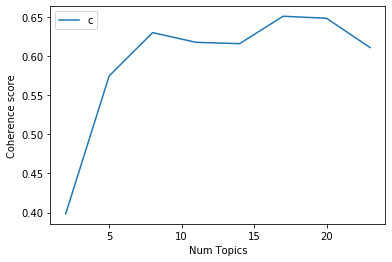

In [0]:
limit=25; start=2; step=3;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict, corpus=corpus, texts=documents, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Número óptimo de topics: 
Aunque el número optimo nos sale entorno a 17. Voy a escoger 5 por simplicidad y veré si con eso los puedo distiguir bien

In [0]:
#Modelo LDA
k=5    
lda_model = models.LdaModel(corpus, id2word=gensim_dict, num_topics=k, iterations=5, passes=20, alpha='auto')

In [0]:
lda_model.show_topics(num_topics=5,num_words=30)

[(0,
  '0.076*"y" + 0.045*"en" + 0.043*"el" + 0.036*"con" + 0.021*"un" + 0.020*"para" + 0.017*"una" + 0.016*"es" + 0.015*"apartamento" + 0.014*"que" + 0.014*"muy" + 0.013*"se" + 0.013*"las" + 0.012*"centro" + 0.012*"cocina" + 0.012*"cama" + 0.012*"minutos" + 0.012*"los" + 0.010*"al" + 0.009*"baño" + 0.008*"barrio" + 0.008*"habitación" + 0.008*"por" + 0.008*"doble" + 0.008*"piso" + 0.007*"lo" + 0.007*"está" + 0.007*"todo" + 0.007*"casa" + 0.007*"dos"'),
 (1,
  '0.016*"ask" + 0.015*"may" + 0.015*"ll" + 0.015*"you" + 0.014*"property" + 0.014*"provided" + 0.014*"nt" + 0.013*"check" + 0.013*"warm" + 0.012*"help" + 0.012*"hand" + 0.012*"do" + 0.012*"€" + 0.012*"doubt" + 0.012*"checkin" + 0.011*"livingroom" + 0.011*"soap" + 0.010*"divided" + 0.010*"hesitate" + 0.010*"kind" + 0.010*"ill" + 0.010*"time" + 0.010*"pm" + 0.009*"extraordinary" + 0.009*"ac" + 0.009*"please" + 0.009*"sofabed" + 0.009*"capital" + 0.009*"international" + 0.009*"glad"'),
 (2,
  '0.011*"latina" + 0.008*"’s" + 0.008*"pala

In [0]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, gensim_dict)
pyLDAvis.display(vis)

Tras ver los topics parece que está división en 5 nos permite seleccionar estos topics:

- Topic 0: General
- Topic 1: Descripción
- Topic 2: Atracciones
- Topic 3: Servicios
- Topic 4: Transporte


Añadiré al dataset una columna por cada uno de estos topics y como sería su distribución en cada una de las viviendas

In [0]:
house_madrid_en["Topic_general"] = 0.0        ## topic 0
house_madrid_en["Topic_descripcion"] = 0.0    ## topic 1
house_madrid_en["Topic_atracciones"] = 0.0    ## topic 2
house_madrid_en["Topic_servicios"] = 0.0      ## topic 3
house_madrid_en["Topic_transporte"] = 0.0     ## topic 4

## Nombres para los topics
def topic_name(i):
        switcher={
                0:'Topic_general',
                1:'Topic_descripcion',
                2:'Topic_atracciones',
                3:'Topic_servicios',
                4:'Topic_transporte',
             }
        return switcher.get(i,"Invalid")
        
for d in range(len(house_madrid_en["description"])):
    bow = gensim_dict.doc2bow(documents[d])
    t = lda_model.get_document_topics(bow)
    
    for i in range(len(t)):
        
        temp = topic_name(t[i][0])
        house_madrid_en.loc[d,temp] = t[i][1]

In [0]:
house_madrid_en.head(10)

,Unnamed: 0,Unnamed: 0.1,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte
0,0,0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,excellent connection airport exhibition ground...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016.0,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.39205,en,0.020197,0.0,0.039728,0.31332,0.618989


In [0]:
#Guardo el df
path_house_en = ruta + 'data/listings_sentiment_topic_en.csv'
listings_sentiment_topic_en = house_madrid_en.to_csv(path_house_en, header=True)

In [0]:
######################### TOPIC MODELING PARA LOS QUE ESTAN EN ESPAÑOL ########################
#Me quedo con el subconjunto de los que están en español

house_madrid_es = house_data1 [house_data1.idioma == 'es']

In [0]:
dato = house_madrid_es.idioma.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

es    7378
Name: idioma, dtype: int64

In [0]:
house_madrid_es.head(10)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma
3,4,24836,https://www.airbnb.com/rooms/24836,20191109094951,2019-11-09,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",select the madrid more cool m bedrooms bathroo...,none,"Cosmopolita, lleno de locales de moda, restaur...",Al estar en el distrito Centro (Barrio de Just...,La situación del apartamento hace accesibles a...,La disponibilidad de acceso al apartamento es ...,El precio marcado es por el alojamiento comple...,Esperamos que los huéspedes traten la casa com...,NaN,NaN,https://a0.muscache.com/im/pictures/573273/8f5...,NaN,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",Mi mayor pasión es viajar y conocer culturas d...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/101653/profil...,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Madrid, Comunidad de Madrid, Spain",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",ES,Spain,40.41995,-3.69764,f,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,$200.00,$0.00,4,$0.00,3,10,3,3,10,10,3.0,10.0,2 weeks ago,t,9,23,53,322,2019-11-09,65,15,2011-06-02,2019-10-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,VT-296,NaN,f,f,moderate,f,f,1,1,0,0,0.63,0.383789,es


## Preprocesado de datos

In [0]:
#Paso a minúscula
house_madrid_es['description'] = house_madrid_es['description'].apply(lambda t: t.lower())

In [0]:
#Quito signos de puntuación
signos_p = list(punctuation)
house_madrid_es['description'] = house_madrid_es['description'].apply(lambda t: "".join( c for c in t if c not in signos_p))

In [0]:
#Elimino Stop Words
stop_words = get_stop_words('es')
house_madrid_es['description'] = house_madrid_es['description'].apply(lambda t: " ".join(t for t in t.split() if t not in stop_words))

In [0]:
#Elimino valores numericos

house_madrid_es['description'] = house_madrid_es['description'].apply(lambda t: re.sub(r'[0-9]', '', t))

In [0]:
#Si hay espacios seguidos los sustituyo por solo uno
house_madrid_es['description'] = house_madrid_es['description'].apply(lambda t: re.sub(r'\s+', ' ', t))

In [0]:
#Guardo el df
path_house_es = ruta + 'data/house_madrid_spanish.csv'
house_madrid_spanish = house_madrid_es.to_csv(path_house_es, header=True)

##Preparamos el Dataset

In [0]:
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

In [0]:
path_csv = ruta + 'data/house_madrid_spanish.csv'

In [0]:
house_madrid_es = pd.read_csv(path_csv, sep =',', decimal='.') # cargamos fichero
pd.set_option('display.max_columns', len(house_madrid_es)) # Para ver todas las columnas
house_madrid_es.head(5) 

,Unnamed: 0,Unnamed: 0.1,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma
0,3,4,24836,https://www.airbnb.com/rooms/24836,20191109094951,2019-11-09,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",select the madrid more cool m bedrooms bathroo...,none,"Cosmopolita, lleno de locales de moda, restaur...",Al estar en el distrito Centro (Barrio de Just...,La situación del apartamento hace accesibles a...,La disponibilidad de acceso al apartamento es ...,El precio marcado es por el alojamiento comple...,Esperamos que los huéspedes traten la casa com...,NaN,NaN,https://a0.muscache.com/im/pictures/573273/8f5...,NaN,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",Mi mayor pasión es viajar y conocer culturas d...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/101653/profil...,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Madrid, Comunidad de Madrid, Spain",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",ES,Spain,40.41995,-3.69764,f,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,$200.00,$0.00,4,$0.00,3,10,3,3,10,10,3.0,10.0,2 weeks ago,t,9,23,53,322,2019-11-09,65,15,2011-06-02,2019-10-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,VT-296,NaN,f,f,moderate,f,f,1,1,0,0,0.63,0.383789,es


In [0]:
description_es = house_madrid_es [['id','description']]

In [0]:
documents = []

for row in description_es.iterrows():   #va recorriendo todas las filas del df
    _,info = row              
    _,description = info
    description = re.sub(r'\n', '', description)
    
    #tokenizo 
    description = [t.text for t in nlp(description.rstrip(), disable=['parser', 'tagger', 'ner','language_detector'])]
    #Lo juntamos todo en un mismo corpus
    documents.append(description)

In [0]:
#Vocabulario
vocab = set([t for doc in documents for t in doc])

w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

'unique tokens {}'.format(len(w2id))

'unique tokens 22122'

## Implementación usando Gensim. Modelo LDA

In [0]:
from gensim import corpora, models, similarities
from math import exp
from gensim.corpora import Dictionary

In [0]:
#Crea el vocabulario/diccionario 
gensim_dict = Dictionary(documents)
len(gensim_dict)  #Veo que me da el mismo resultado que se ha obtenido antes

22122

In [0]:
##Voy a filtrar para dejar fuera palabras que aparezcan en menos de 20 documentos y en más del 15% de
#los documentos

gensim_dict.filter_extremes(no_below=20, no_above=0.15) 
print(gensim_dict)

Dictionary(2403 unique tokens: ['all', 'americana', 'and', 'animado', 'antón']...)


In [0]:
corpus = [gensim_dict.doc2bow(doc) for doc in documents]    #bag of word en base al vocabulario

In [0]:
!pip install tqdm

from tqdm import tqdm

Voy a buscar los 5 topics principiales y a ver si coinciden con los encontrados en inglés

In [0]:
#Modelo LDA
k=5    
lda_model = models.LdaModel(corpus, id2word=gensim_dict, num_topics=k, iterations=5, passes=20, alpha='auto')

In [0]:
lda_model.show_topics(num_topics=5,num_words=30)

[(0,
  '0.024*"atocha" + 0.018*"museo" + 0.016*"palacio" + 0.016*"caminando" + 0.016*"latina" + 0.015*"real" + 0.015*"retiro" + 0.014*"museos" + 0.012*"prado" + 0.012*"lugares" + 0.012*"min" + 0.011*"reina" + 0.011*"interés" + 0.010*"ir" + 0.009*"mercado" + 0.008*"san" + 0.008*"alojamiento" + 0.008*"lado" + 0.008*"sofía" + 0.007*"pie" + 0.007*"lugar" + 0.007*"ubicación" + 0.007*"lavapiés" + 0.007*"sitios" + 0.007*"río" + 0.007*"rastro" + 0.006*"ubicado" + 0.006*"tren" + 0.006*"paseo" + 0.006*"céntrico"'),
 (1,
  '0.016*"vía" + 0.012*"disfrutar" + 0.010*"corazón" + 0.009*"espacio" + 0.008*"malasaña" + 0.008*"chueca" + 0.007*"tiendas" + 0.007*"mejor" + 0.007*"estudio" + 0.006*"ubicado" + 0.006*"españa" + 0.006*"moderno" + 0.006*"€" + 0.006*"decoración" + 0.006*"ocio" + 0.005*"capital" + 0.005*"ubicación" + 0.005*"moda" + 0.005*"barrios" + 0.005*"tipo" + 0.005*"diseño" + 0.005*"horas" + 0.005*"mejores" + 0.005*"vistas" + 0.005*"calles" + 0.004*"perfecto" + 0.004*"después" + 0.004*"podrás"

In [0]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, gensim_dict)
pyLDAvis.display(vis)

Vamos los mismos topics que en inglés:

- Topic 0: Atracciones
- Topic 1: Descripcion
- Topic 2: Servicios
- Topic 3: Transporte
- Topic 4: General

Añadiré al dataset una columna por cada uno de estos topics y como sería su distribución en cada una de las viviendas

In [0]:
house_madrid_es["Topic_atracciones"] = 0.0    ## topic 0
house_madrid_es["Topic_descripcion"] = 0.0    ## topic 1
house_madrid_es["Topic_servicios"] = 0.0      ## topic 2
house_madrid_es["Topic_transporte"] = 0.0     ## topic 3
house_madrid_es["Topic_general"] = 0.0        ## topic 4

## Nombres para los topics
def topic_name(i):
        switcher={
                0:'Topic_atracciones',
                1:'Topic_descripcion',
                2:'Topic_servicios',
                3:'Topic_transporte',
                4:'Topic_general',
             }
        return switcher.get(i,"Invalid")
        
for d in range(len(house_madrid_es["description"])):
    bow = gensim_dict.doc2bow(documents[d])
    t = lda_model.get_document_topics(bow)
    
    for i in range(len(t)):
        
        temp = topic_name(t[i][0])
        house_madrid_es.loc[d,temp] = t[i][1]

In [0]:
house_madrid_es.head(10)

,Unnamed: 0,Unnamed: 0.1,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_atracciones,Topic_descripcion,Topic_servicios,Topic_transporte,Topic_general
0,3,4,24836,https://www.airbnb.com/rooms/24836,20191109094951,2019-11-09,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",select the madrid more cool m bedrooms bathroo...,none,"Cosmopolita, lleno de locales de moda, restaur...",Al estar en el distrito Centro (Barrio de Just...,La situación del apartamento hace accesibles a...,La disponibilidad de acceso al apartamento es ...,El precio marcado es por el alojamiento comple...,Esperamos que los huéspedes traten la casa com...,NaN,NaN,https://a0.muscache.com/im/pictures/573273/8f5...,NaN,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",Mi mayor pasión es viajar y conocer culturas d...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/101653/profil...,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Madrid, Comunidad de Madrid, Spain",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",ES,Spain,40.41995,-3.69764,f,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,$200.00,$0.00,4,$0.00,3,10,3,3,10,10,3.0,10.0,2 weeks ago,t,9,23,53,322,2019-11-09,65,15,2011-06-02,2019-10-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,VT-296,NaN,f,f,moderate,f,f,1,1,0,0,0.63,0.383789,es,0.171788,0.219996,0.112823,0.018829,0.476564


In [0]:
#Guardo el df
path_house_es = ruta + 'data/listings_sentiment_topic_es.csv'
listings_sentiment_topic_es = house_madrid_es.to_csv(path_house_es, header=True)

## Union de datasets: Inglés y Español

Carga de datos

In [0]:
path_csv = ruta + 'data/listings_sentiment_topic_en.csv'

In [0]:
house_madrid_en = pd.read_csv(path_csv, sep =',', decimal='.') # cargamos fichero
pd.set_option('display.max_columns', len(house_madrid_en)) # Para ver todas las columnas
house_madrid_en.head(3) 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte
0,0,0,0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,excellent connection airport exhibition ground...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016.0,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.392050,en,0.020197,0.000000,0.039728,0.313320,0.618989
1,1,1,1,21853,https://www.airbnb.com/rooms/21853,20191109094951,2019-11-09,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,quiet sunny room good view bedroom flat welcom...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-2

In [0]:

path_csv = ruta + 'data/listings_sentiment_topic_es.csv'

In [0]:
house_madrid_es = pd.read_csv(path_csv, sep =',', decimal='.') # cargamos fichero
pd.set_option('display.max_columns', len(house_madrid_es)) # Para ver todas las columnas
house_madrid_es.head(3) 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_atracciones,Topic_descripcion,Topic_servicios,Topic_transporte,Topic_general
0,0,3,4,24836,https://www.airbnb.com/rooms/24836,20191109094951,2019-11-09,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",select the madrid more cool m bedrooms bathroo...,none,"Cosmopolita, lleno de locales de moda, restaur...",Al estar en el distrito Centro (Barrio de Just...,La situación del apartamento hace accesibles a...,La disponibilidad de acceso al apartamento es ...,El precio marcado es por el alojamiento comple...,Esperamos que los huéspedes traten la casa com...,NaN,NaN,https://a0.muscache.com/im/pictures/573273/8f5...,NaN,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",Mi mayor pasión es viajar y conocer culturas d...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/101653/profil...,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Madrid, Comunidad de Madrid, Spain",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",ES,Spain,40.41995,-3.69764,f,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,$200.00,$0.00,4,$0.00,3,10,3,3,10,10,3.0,10.0,2 weeks ago,t,9,23,53,322,2019-11-09,65,15,2011-06-02,2019-10-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,VT-296,NaN,f,f,moderate,f,f,1,1,0,0,0.63,0.383789,es,0.171788,0.219996,0.112823,0.018829,0.476564
1,1,8,9,59923,https://www.airbnb.com/rooms/59923,20191109094951,2019-11-09,Habitación para féminas en el centro de Madrid,"Si eres mujer, en nuestra casa encontrarás un ...",Te ofrezco una preciosa habitación individual ...,si mujer casa encontrarás ambiente familiar se...,none,"Nuestra casa está en el centro de la ciudad, a...","Vivimos en una zona muy tranquila, pese a que ...","Hay muchas líneas de metro y autobús, taxis po...","La habitación es privada, no así el cuarto de ...","Obviamente, yo estoy dispuesta a ayudar a la h...","-Se aceptan huéspedes de cualquier edad, eso s...",NaN,NaN,https://a0.muscache.com/im/picture

Elimino las columnas Unnamed

In [0]:
house_madrid_en.drop(house_madrid_en.columns[house_madrid_en.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
house_madrid_es.drop(house_madrid_es.columns[house_madrid_es.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [0]:
house_madrid_en.head(3)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte
0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,excellent connection airport exhibition ground...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016.0,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.392050,en,0.020197,0.000000,0.039728,0.313320,0.618989
1,21853,https://www.airbnb.com/rooms/21853,20191109094951,2019-11-09,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,quiet sunny room good view bedroom flat welcom...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi ever

In [0]:
house_madrid_es.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_atracciones,Topic_descripcion,Topic_servicios,Topic_transporte,Topic_general
0,24836,https://www.airbnb.com/rooms/24836,20191109094951,2019-11-09,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",select the madrid more cool m bedrooms bathroo...,none,"Cosmopolita, lleno de locales de moda, restaur...",Al estar en el distrito Centro (Barrio de Just...,La situación del apartamento hace accesibles a...,La disponibilidad de acceso al apartamento es ...,El precio marcado es por el alojamiento comple...,Esperamos que los huéspedes traten la casa com...,NaN,NaN,https://a0.muscache.com/im/pictures/573273/8f5...,NaN,101653,https://www.airbnb.com/users/show/101653,Tenty,2010-03-31,"Las Rozas, Madrid, Spain",Mi mayor pasión es viajar y conocer culturas d...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/101653/profil...,https://a0.muscache.com/im/users/101653/profil...,Justicia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Madrid, Comunidad de Madrid, Spain",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",ES,Spain,40.41995,-3.69764,f,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,$200.00,$0.00,4,$0.00,3,10,3,3,10,10,3.0,10.0,2 weeks ago,t,9,23,53,322,2019-11-09,65,15,2011-06-02,2019-10-14,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,VT-296,NaN,f,f,moderate,f,f,1,1,0,0,0.63,0.383789,es,0.171788,0.219996,0.112823,0.018829,0.476564
1,59923,https://www.airbnb.com/rooms/59923,20191109094951,2019-11-09,Habitación para féminas en el centro de Madrid,"Si eres mujer, en nuestra casa encontrarás un ...",Te ofrezco una preciosa habitación individual ...,si mujer casa encontrarás ambiente familiar se...,none,"Nuestra casa está en el centro de la ciudad, a...","Vivimos en una zona muy tranquila, pese a que ...","Hay muchas líneas de metro y autobús, taxis po...","La habitación es privada, no así el cuarto de ...","Obviamente, yo estoy dispuesta a ayudar a la h...","-Se aceptan huéspedes de cualquier edad, eso s...",NaN,NaN,https://a0.muscache.com/im/pictures/365063/592...,NaN,288380,https://www.airbnb.com/u

In [0]:
#Uno ambos datasets
house_madrid = house_madrid_en.append (house_madrid_es, sort=False)
house_madrid.head (-5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment,idioma,Topic_general,Topic_descripcion,Topic_atracciones,Topic_servicios,Topic_transporte
0,6369,https://www.airbnb.com/rooms/6369,20191109094951,2019-11-09,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,excellent connection airport exhibition ground...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/13660/profile...,https://a0.muscache.com/im/users/13660/profile...,Hispanoamérica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,today,t,29,59,89,89,2019-11-09,68,9,2010-03-14,2019-10-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.58,0.392050,en,0.020197,0.000000,0.039728,0.313320,0.618989
1,21853,https://www.airbnb.com/rooms/21853,20191109094951,2019-11-09,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,quiet sunny room good view bedroom flat welcom...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Many thanks for not smoking at home.,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everyb

In [0]:
#Guardo el df
path_house = ruta + 'data/listings_sentiment_topic.csv'
listings_sentiment_topic = house_madrid.to_csv(path_house, header=True)